# AML Assignment 4
## Eliza Climo


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.datasets import make_blobs
import matplotlib.patches as mpatches

In [2]:
#1
titanicDF = pd.read_csv("/Users/elizaclimo/AML Jupyter Workspace/titanic.csv")
titanicDF.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanicDF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#2
titanicDF = titanicDF.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])
titanicDF = titanicDF.reindex(columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived'])

In [5]:
#3,4
titanicDF['Sex'].replace(['female','male'],[0,1],inplace=True)
titanicDF.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [6]:
#5
titanicDF.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

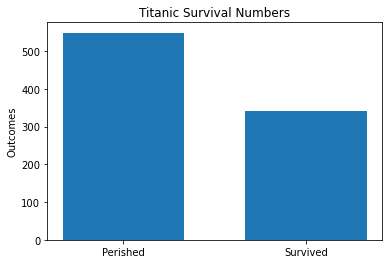

In [7]:
#6
counts=titanicDF['Survived'].value_counts()
w=.2
plt.bar(x=[0,.3], height=counts, width=w)
plt.xticks([0,.3], ('Perished','Survived'))
plt.ylabel("Outcomes")
plt.title("Titanic Survival Numbers")
plt.show()


In [8]:
#7
titanicDF.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

In [9]:
#8
grouped = titanicDF.groupby('Survived').mean()
grouped.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


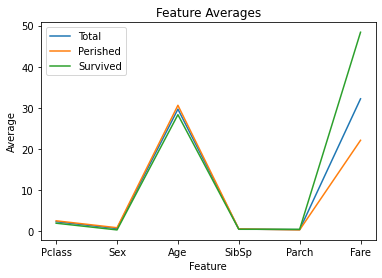

In [10]:
#9
x = titanicDF.drop(columns = ['Survived'])
xmean = x.mean()
plt.plot(x.columns, x.mean(), label='Total')
plt.plot(x.columns, grouped.loc[0], label='Perished')
plt.plot(x.columns, grouped.loc[1], label='Survived')
plt.plot(label='Survived')
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Average")
plt.legend()
plt.show()

In [11]:
averages = pd.DataFrame([xmean,grouped.loc[0],grouped.loc[1]] , index=['Total','Perished','Survived'])
averages.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
Total,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
Perished,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
Survived,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


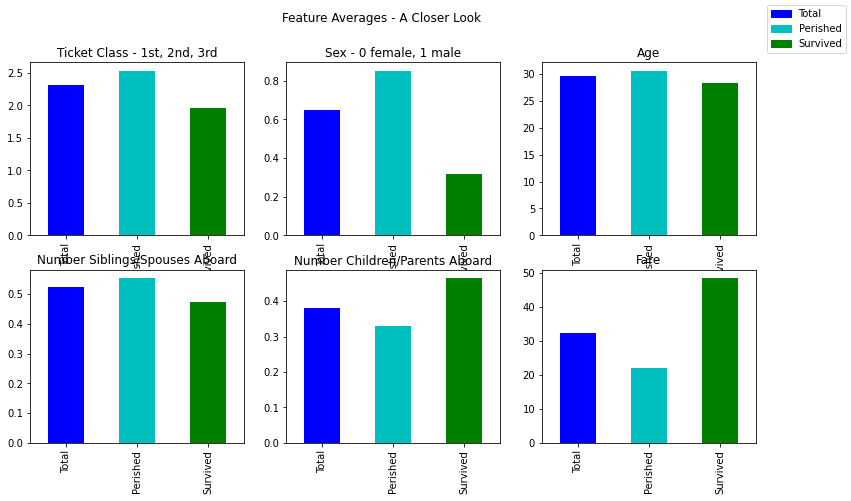

In [12]:
#10 -- need to get rid of x-axis tick labels
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(13,7))

fig.suptitle("Feature Averages - A Closer Look")
my_colors = list('bcg')
averages['Pclass'].plot(kind='bar', ax=ax[0,0], title="Ticket Class - 1st, 2nd, 3rd", color=my_colors)
averages['Sex'].plot(kind='bar',ax=ax[0,1], title="Sex - 0 female, 1 male", color=my_colors)
averages['Age'].plot(kind='bar',ax=ax[0,2], title="Age", color=my_colors)
averages['SibSp'].plot(kind='bar',ax=ax[1,0], title="Number Siblings/Spouses Aboard", color=my_colors)
averages['Parch'].plot(kind='bar',ax=ax[1,1], title="Number Children/Parents Aboard", color=my_colors)
averages['Fare'].plot(kind='bar',ax=ax[1,2], title="Fare", color=my_colors)

t = mpatches.Patch(color='blue', label='Total')
p = mpatches.Patch(color='c', label='Perished')
s = mpatches.Patch(color='green', label='Survived')

fig.legend(handles=[t,p,s])


In [13]:
#11 

columns = ['Pclass','Sex','SibSp','Parch','Fare']
for feature in columns:
    print(feature,": ",np.corrcoef(titanicDF[feature],titanicDF['Survived'])[0][1])

print("Age : " , np.corrcoef(titanicDF['Age'].notna(),titanicDF['Survived'])[0][1])


Pclass :  -0.33848103596101475
Sex :  -0.5433513806577555
SibSp :  -0.035322498885735645
Parch :  0.08162940708348372
Fare :  0.2573065223849625
Age :  0.09219652324217212


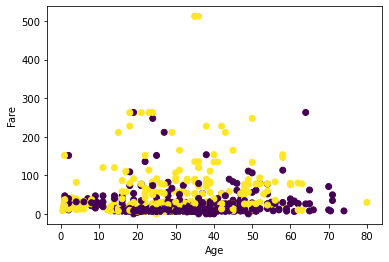

In [14]:
#12
plt.scatter(titanicDF['Age'],titanicDF['Fare'], c=titanicDF['Survived'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()